# BAIT 508 HW2: SEC Filings Text Analytics
# DUE DATE: Friday, Oct 4th, 2019 11:59 p.m.!

This assignment was developed by Raymond Situ, Myunghwan Lee, and Gene Moo Lee.

In this assignment you will use your NLP and Python skills to analyze text data and answer the following questions.

Answer all 20 questions below and have your answers written to a JSON file. The format of the JSON should have the "ans_" (e.g. "ans1") as the key and the answer to the question as the value as type string unless there are multiple answers then the type of the value should be a list of strings. For visualization questions save them separately using the specified file name. Also see example.json. The file name of the JSON file should be FIRSTNAME_LASTNAME_STUDENTNUMBER.json

In [57]:
# load the full corpus_10k_2015-2019.csv data
# then create subset of file containing the first 1,000 observations from year 2019 
# save these into a csv file called "corpus.subset.csv"


In [2]:
!pip install wordcloud

In [4]:
!pip install textblob

In [5]:
import pandas as pd
#!python -m spacy download en
#!pip install spacy
import nltk
import spacy
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import requests
from bs4 import BeautifulSoup
import json
from nltk.tokenize import TweetTokenizer
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import textblob
from textblob import TextBlob
from collections import Counter
import json
import string
%matplotlib inline

In [6]:
data= pd.read_csv("corpus_10k_2015-2019.csv")

In [7]:
data.head()

,id,cik,name,sic,year,filing_date,fiscal_period,item_1,item_2,item_3,...,item_12,item_13,item_14,item_1a,item_1b,item_7a,item_7b,item_9a,item_9b,Unnamed: 27
0,1022505-2015,1022505,NATIONAL SCIENTIFIC CORP/AZ,7374,2015,20150105,20140930,ITEM BUSINESS General The financial statem...,ITEM PROPERTIES Starting in January t...,NaN,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTANT FEES AND SERVICE...,NaN,ITEM B UNRESOLVED STAFF COMMENTS This Item i...,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSUR...,NaN,ITEM A CONTROLS AND PROCEDURES Evaluation of...,ITEM B OTHER INFORMATION There are no events...,NaN
1,1497649-2015,1497649,Vanguard Energy Corp,1381,2015,20150105,20140930,ITEM BUSINESS We were incorporated in Colo...,ITEM PROPERTIES None,ITEM LEGAL PROCEEDINGS Not applicable,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTING FEES AND SERVICES...,NaN,NaN,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSUR...,NaN,ITEM A CONTROLS AND PROCEDURES An evaluation...,ITEM B OTHER INFORMATION None PART III,NaN
2,1100397-2015,1100397,"Advaxis, Inc.",2834,2015,20150106,20141031,Item Business General Advaxis Inc Advax...,Item Properties Our corporate offices are ...,Item Legal Proceedings Iliad Research and ...,...,Item Security Ownership of Certain Benefic...,Item Certain Relationships and Related Tra...,Item Principal Accountant Fees and Service...,Item A Risk Factors You should carefully co...,NaN,Item A Quantitative and Qualitative Disclosu...,NaN,Item A Controls and Procedures As of the en...,Item B Other Information None PART III,NaN
3,109657-2015,109657,OXIS INTERNATIONAL INC,2834,2015,20150108,20131231,ITEM BUSINESS OXIS International Inc is en...,ITEM PROPERTIES Our principal executive offi...,ITEM LEGAL PROCEEDINGS In March Nexdi...,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFICI...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRAN...,ITEM PRINCIPAL ACCOUNTANT FEES AND SERVICES...,ITEM A RISK FACTORS This company qualifies as...,ITEM B UNRESOLVED STAFF COMMENTS Not applicab...,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSUR...,NaN,ITEM A CONTROLS AND PROCEDURES Evaluation of ...,ITEM B OTHER INFORMATION None PART III,NaN
4,310056-2015,310056,VICON INDUSTRIES INC /NY/,3669,2015,20150112,20140930,ITEM BUSINESS General Vicon Industries In...,ITEM PROPERTIES The Company operates from ...,ITEM LEGAL PROCEEDINGS None,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFI...,ITEM CERTAIN RELATIONSHIPS AND RELATED TR...,ITEM PRINCIPAL ACCOUNTANT FEES AND SERVICES...,NaN,ITEM B UNRESOLVED STAFF COMMENTS None,NaN,NaN,ITEM A CONTROLS AND PROCEDURES Evaluation of ...,ITEM B OTHER INFORMATION None PART III,NaN


In [8]:
data.dtypes

id                object
cik                int64
name              object
sic               object
year               int64
filing_date        int64
fiscal_period      int64
item_1            object
item_2            object
item_3            object
item_4            object
item_5            object
item_6            object
item_7            object
item_8            object
item_9            object
item_10           object
item_11           object
item_12           object
item_13           object
item_14           object
item_1a           object
item_1b           object
item_7a           object
item_7b          float64
item_9a           object
item_9b           object
Unnamed: 27      float64
dtype: object

In [9]:
data_sub=data.loc[data["year"]==2019,:].reset_index(level=None,drop=True).head(1000)

In [10]:
data_sub.shape

(1000, 28)

In [11]:
data_sub.to_csv(r'corpus.subset.csv', index = None, header=True)

In [12]:
# create dataframe from corpus.subset.csv, we will be using this dataset from now onwards

# view first 5 rows using head


In [13]:
df=  pd.read_csv('corpus.subset.csv')

In [14]:
df.head()

,id,cik,name,sic,year,filing_date,fiscal_period,item_1,item_2,item_3,...,item_12,item_13,item_14,item_1a,item_1b,item_7a,item_7b,item_9a,item_9b,Unnamed: 27
0,1625376-2019,1625376,PACMAN MEDIA INC.,7373,2019,20190108,20181031,NaN,Item Description of Properties We do not own...,Item Legal proceedings We are not party to...,...,Item Security Ownership of Certain Benefic...,Item Certain Relationships and Related Tra...,Item Principal Accounting Fees and Service...,Item A Risk Factors Not applicable to small...,Item B Unresolved Staff Comments We do not ...,Item A Quantitative and Qualitative Disclosu...,NaN,Item A T Controls and Procedures DISCLOS...,Item B Other Information All other informat...,NaN
1,1547996-2019,1547996,"Notis Global, Inc.",3585,2019,20190108,20161231,ITEM BUSINESS Overview We are a diversified...,ITEM PROPERTIES On August we purch...,ITEM LEGAL PROCEEDINGS Medvend On May ...,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTING FEES AND SERVICE...,ITEM A RISK FACTORS Investing in our common ...,NaN,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSU...,NaN,ITEM A CONTROLS AND PROCEDURES Disclosure c...,ITEM B OTHER INFORMATION None PART III,NaN
2,1353611-2019,1353611,Invesco CurrencyShares British Pound Sterling ...,6221,2019,20190111,20181031,NaN,NaN,NaN,...,Item Security Ownership of Certain Benefici...,Item Certain Relationships and Related Tran...,NaN,NaN,Item B Unresolved Staff Comments None,NaN,NaN,Item A Controls and Procedures Evaluation of ...,NaN,NaN
3,1435064-2019,1435064,CEMTREX INC,3829,2019,20190111,20180930,Item BUSINESS Cemtrex was incorporated in ...,ITEM PROPERTIES The Company has the followi...,ITEM LEGAL PROCEEDINGS Three alleged securi...,...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTANT FEES AND SERVICE...,ITEM A RISK FACTORS Investing in our common ...,ITEM B UNRESOLVED STAFF COMMENTS None,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSU...,NaN,ITEM A CONTROLS AND PROCEDURES Disclosure Co...,ITEM B OTHER INFORMATION Three securities cl...,NaN
4,715446-2019,715446,Anixa Biosciences Inc,8071,2019,20190111,20181031,Item Business Overview We were incorporated...,Item Properties We lease approximately ...,Item Legal Proceedings Other than as descri...,...,Item Security Ownership of Certain Benefic...,Item Certain Relationships and Related Tra...,Item Principal Accounting Fees and Service...,Item A Risk Factors Our business involves a...,Item B Unresolved Staff Comments None,Item A Quantitative and Qualitative Disclosu...,NaN,Item A Controls and Procedures Disclosure C...,Item B Other Information None PART III,NaN


In [15]:
df.shape

(1000, 28)

In [16]:
# Drop the columns where all elements are NaN (in other words, this column contains no useful information)
# recommendation: use "dropna()" function from pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [17]:
df.isnull().sum()

id                  0
cik                 0
name                0
sic                 0
year                0
filing_date         0
fiscal_period       0
item_1             89
item_2             38
item_3             28
item_4             66
item_5             71
item_6             58
item_7             74
item_8             59
item_9             16
item_10            52
item_11            43
item_12            46
item_13            41
item_14            68
item_1a            75
item_1b            68
item_7a            78
item_7b          1000
item_9a            51
item_9b            84
Unnamed: 27      1000
dtype: int64

In [18]:
df=df.dropna(axis='columns',how='all')

In [19]:
df.shape

(1000, 26)

In [74]:
# fill missing values with empty ("") string. 
# recommendation: use fillna() function from pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

# use the head function confirm that missing values have been replaced


In [20]:
df=df.fillna("")

In [21]:
df.head()

,id,cik,name,sic,year,filing_date,fiscal_period,item_1,item_2,item_3,...,item_10,item_11,item_12,item_13,item_14,item_1a,item_1b,item_7a,item_9a,item_9b
0,1625376-2019,1625376,PACMAN MEDIA INC.,7373,2019,20190108,20181031,,Item Description of Properties We do not own...,Item Legal proceedings We are not party to...,...,Item Directors Executive Officers Promote...,Item Executive Compensation Since our in...,Item Security Ownership of Certain Benefic...,Item Certain Relationships and Related Tra...,Item Principal Accounting Fees and Service...,Item A Risk Factors Not applicable to small...,Item B Unresolved Staff Comments We do not ...,Item A Quantitative and Qualitative Disclosu...,Item A T Controls and Procedures DISCLOS...,Item B Other Information All other informat...
1,1547996-2019,1547996,"Notis Global, Inc.",3585,2019,20190108,20161231,ITEM BUSINESS Overview We are a diversified...,ITEM PROPERTIES On August we purch...,ITEM LEGAL PROCEEDINGS Medvend On May ...,...,ITEM DIRECTORS EXECUTIVE OFFICERS AND COR...,ITEM EXECUTIVE COMPENSATION Summary Compen...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTING FEES AND SERVICE...,ITEM A RISK FACTORS Investing in our common ...,,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSU...,ITEM A CONTROLS AND PROCEDURES Disclosure c...,ITEM B OTHER INFORMATION None PART III
2,1353611-2019,1353611,Invesco CurrencyShares British Pound Sterling ...,6221,2019,20190111,20181031,,,,...,,Item Executive Compensation The Trust has n...,Item Security Ownership of Certain Benefici...,Item Certain Relationships and Related Tran...,,,Item B Unresolved Staff Comments None,,Item A Controls and Procedures Evaluation of ...,
3,1435064-2019,1435064,CEMTREX INC,3829,2019,20190111,20180930,Item BUSINESS Cemtrex was incorporated in ...,ITEM PROPERTIES The Company has the followi...,ITEM LEGAL PROCEEDINGS Three alleged securi...,...,ITEM DIRECTORS EXECUTIVE OFFICERS AND COR...,ITEM EXECUTIVE COMPENSATION We incorporate...,ITEM SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM PRINCIPAL ACCOUNTANT FEES AND SERVICE...,ITEM A RISK FACTORS Investing in our common ...,ITEM B UNRESOLVED STAFF COMMENTS None,ITEM A QUANTITATIVE AND QUALITATIVE DISCLOSU...,ITEM A CONTROLS AND PROCEDURES Disclosure Co...,ITEM B OTHER INFORMATION Three securities cl...
4,715446-2019,715446,Anixa Biosciences Inc,8071,2019,20190111,20181031,Item Business Overview We were incorporated...,Item Properties We lease approximately ...,Item Legal Proceedings Other than as descri...,...,Item Directors Executive Officers and Cor...,Item Executive Compensation The following...,Item Security Ownership of Certain Benefic...,Item Certain Relationships and Related Tra...,Item Principal Accounting Fees and Service...,Item A Risk Factors Our business involves a...,Item B Unresolved Staff Comments None,Item A Quantitative and Qualitative Disclosu...,Item A Controls and Procedures Disclosure C...,Item B Other Information None PART III


In [22]:
# web scrape SIC code and names using BeautifulSoup
# from "https://en.wikipedia.org/wiki/Standard_Industrial_Classification" collect the industry names for
# sic codes from the "List of codes" section of the wikipedia page
# replace the SIC code "0100 (01111...)" from the table with 0100
# recommendation: create a dictionary where the key is the sic code and the value is the industry name


In [23]:
# Specify url: url
url = 'https://en.wikipedia.org/wiki/Standard_Industrial_Classification'

# Package the request, send the request and catch the response: r
html_doc = requests.get(url).text


In [24]:
print(html_doc[0:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Standard Industrial Classification - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4c700a06-d9a9-4dbb-b6c0-225a2a0147d0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Standard_Industrial_Classification","wgTitle":"Standard Industrial Classification","wgCurRevisionId":980699619,"wgRevisionId":980699619,"wgArticleId":68040,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Official website not in Wikidata","1937 establishments in the United States","Industry","Industry classifica

In [25]:
soup = BeautifulSoup(html_doc, "lxml")

In [26]:
tables = soup.find_all('table')
print(type(tables))
print(len(tables))

<class 'bs4.element.ResultSet'>
2


In [27]:
first_table = tables[1]
print(type(first_table))

<class 'bs4.element.Tag'>


In [28]:
first_table

<table class="wikitable sortable">
<tbody><tr>
<th>SIC Code
</th>
<th>Industry
</th></tr>
<tr>
<td>0100 (01111...)
</td>
<td>Agricultural Production-Crops
</td></tr>
<tr>
<td>0200
</td>
<td>Agricultural Prod-Livestock &amp; Animal Specialties
</td></tr>
<tr>
<td>0700
</td>
<td>Agricultural Services
</td></tr>
<tr>
<td>0800
</td>
<td><a href="/wiki/Forestry" title="Forestry">Forestry</a>
</td></tr>
<tr>
<td>0900
</td>
<td>Fishing, Hunting and Trapping
</td></tr>
<tr>
<td>1000
</td>
<td>Metal <a href="/wiki/Mining" title="Mining">Mining</a>
</td></tr>
<tr>
<td>1040
</td>
<td>Gold and Silver Ores
</td></tr>
<tr>
<td>1090
</td>
<td>Miscellaneous Metal Ores
</td></tr>
<tr>
<td>1220
</td>
<td>Bituminous Coal &amp; Lignite Mining
</td></tr>
<tr>
<td>1221
</td>
<td>Bituminous Coal &amp; Lignite Surface Mining
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/List_of_crude_petroleum_and_natural_gas_companies" title="List of crude petroleum and natural gas companies">1311</a>
</td>
<td>Crud

In [29]:
trs = first_table.find_all('tr')
print(len(trs))

453


In [30]:
sic_name = dict()
for tr in trs:
    try:
        tds = tr.find_all('td')
        k = tds[0].get_text().strip()
        v = tds[1].get_text().strip()
        sic_name[k] = v
    #print()
    except:
        continue

sic_name

{'0100 (01111...)': 'Agricultural Production-Crops',
 '0200': 'Agricultural Prod-Livestock & Animal Specialties',
 '0700': 'Agricultural Services',
 '0800': 'Forestry',
 '0900': 'Fishing, Hunting and Trapping',
 '1000': 'Metal Mining',
 '1040': 'Gold and Silver Ores',
 '1090': 'Miscellaneous Metal Ores',
 '1220': 'Bituminous Coal & Lignite Mining',
 '1221': 'Bituminous Coal & Lignite Surface Mining',
 '1311': 'Crude Petroleum & Natural Gas',
 '1381': 'Drilling Oil & Gas Wells',
 '1382': 'Oil & Gas Field Exploration Services',
 '1389': 'Oil & Gas Field Services, NEC',
 '1400': 'Mining & Quarrying of Nonmetallic Minerals (No Fuels)',
 '1520': 'General Bldg Contractors - Residential Bldgs',
 '1531': 'Operative Builders',
 '1540': 'General Bldg Contractors - Nonresidential Bldgs',
 '1600': 'Heavy Construction Other Than Bldg Const - Contractors',
 '1623': 'Water, Sewer, Pipeline, Comm & Power Line Construction',
 '1629': 'Heavy Construction, Not Elsewhere Classified[9]',
 '1700': 'Construc

In [31]:
len(sic_name)

452

In [32]:
sic_name['0100']=sic_name.pop("0100 (01111...)")

In [33]:
len(sic_name)

452

In [34]:
sic_name

{'0200': 'Agricultural Prod-Livestock & Animal Specialties',
 '0700': 'Agricultural Services',
 '0800': 'Forestry',
 '0900': 'Fishing, Hunting and Trapping',
 '1000': 'Metal Mining',
 '1040': 'Gold and Silver Ores',
 '1090': 'Miscellaneous Metal Ores',
 '1220': 'Bituminous Coal & Lignite Mining',
 '1221': 'Bituminous Coal & Lignite Surface Mining',
 '1311': 'Crude Petroleum & Natural Gas',
 '1381': 'Drilling Oil & Gas Wells',
 '1382': 'Oil & Gas Field Exploration Services',
 '1389': 'Oil & Gas Field Services, NEC',
 '1400': 'Mining & Quarrying of Nonmetallic Minerals (No Fuels)',
 '1520': 'General Bldg Contractors - Residential Bldgs',
 '1531': 'Operative Builders',
 '1540': 'General Bldg Contractors - Nonresidential Bldgs',
 '1600': 'Heavy Construction Other Than Bldg Const - Contractors',
 '1623': 'Water, Sewer, Pipeline, Comm & Power Line Construction',
 '1629': 'Heavy Construction, Not Elsewhere Classified[9]',
 '1700': 'Construction - Special Trade Contractors',
 '1731': 'Electric

In [35]:
sic_name1=pd.DataFrame.from_dict(sic_name, orient='index').reset_index()

In [36]:
sic_name1.head()

,index,0
0,0200,Agricultural Prod-Livestock & Animal Specialties
1,0700,Agricultural Services
2,0800,Forestry
3,0900,"Fishing, Hunting and Trapping"
4,1000,Metal Mining


In [39]:
# add a new column "industry_name" to your dataframe
# this new column will have the industry name that corresponds to the SIC code
# example, if a row has a SIC code of 1000, then value of its industry name will be "Forestry"


In [40]:
sic_name1.rename(columns={0: 'industry_name','index':'sic_code'}, inplace=True)

In [41]:
sic_name1

,sic_code,industry_name
0,0200,Agricultural Prod-Livestock & Animal Specialties
1,0700,Agricultural Services
2,0800,Forestry
3,0900,"Fishing, Hunting and Trapping"
4,1000,Metal Mining
...,...,...
447,8888,Foreign Governments
448,8900,"Services-Services, NEC"
449,9721,International Affairs
450,9995,Non-Operating Establishments


In [42]:
sic_name1['sic_code'] = pd.to_numeric(sic_name1['sic_code'])

In [43]:
sic_name1.dtypes

sic_code          int64
industry_name    object
dtype: object

In [44]:
df=pd.merge(df, sic_name1,  left_on='sic', right_on='sic_code')

In [45]:
df=df.drop(['sic_code'],axis=1)

In [46]:
df.shape

(1000, 27)

In [47]:
# Industry analysis (Q1-Q4)
# Q1. What are the 20 most common industries? 
# Get a list of industry names (not SIC codes) as "ans1".
ans1=list(df["industry_name"].value_counts().head(20).index[0:20].tolist())
print(ans1)

['Pharmaceutical Preparations', 'Blank Checks', 'Biological Products, (No Diagnostic Substances)', 'Services-Prepackaged Software', 'Surgical & Medical Instruments & Apparatus', 'State Commercial Banks', 'Crude Petroleum & Natural Gas', 'Commodity Contracts Brokers & Dealers', 'Services-Business Services, NEC', 'Semiconductors & Related Devices', 'Savings Institution, Federally Chartered', 'Services-Computer Processing & Data Preparation', 'Services-Management Consulting Services', 'Oil & Gas Field Services, NEC', 'Services-Computer Programming, Data Processing, Etc.', 'Electromedical & Electrotherapeutic Apparatus', 'Services-Medical Laboratories', 'Services-Commercial Physical & Biological Research', 'National Commercial Banks', 'Fire, Marine & Casualty Insurance']


In [48]:
# Q2. Out of all the industries with the prefix "Services" what are the 5 most common?
# Store the answer as a list of industry names as "ans2".

df["first_word"]=df["industry_name"].apply(lambda x: x.startswith("Services"))
ans2=list(Counter(df.loc[(df["first_word"]==True),(["industry_name"])].iloc[:,0]).most_common(5))
print(ans2)

[('Services-Prepackaged Software', 49), ('Services-Business Services, NEC', 20), ('Services-Computer Processing & Data Preparation', 15), ('Services-Management Consulting Services', 13), ('Services-Computer Programming, Data Processing, Etc.', 13)]


In [49]:
# Q3. What is the name of the company with "id" 1353611-2019?
# Store the company name as a string "ans3".
ans3 = str(df[["name","id"]].loc[(df.id=="1353611-2019"),:].reset_index(level=None,drop=True).iloc[0][0])
print(ans3)

Invesco CurrencyShares British Pound Sterling Trust


In [50]:
# Q4. What is the industry name of the company with name Solar Quartz Technologies Corp?
# Store the answer as a string "ans4".
ans4 = str(df[["industry_name","name"]].loc[(df.name=="Solar Quartz Technologies Corp"),:].reset_index(level=None,drop=True).iloc[0][0])
print(ans4)

Metal Mining


In [166]:
# Keyword analysis (Q5 and Q6)
#
# For Q5 and Q6 you will filter out stopwords and non-alphanumeric English characters. 
# You can use "nltk.corpus.stopwords" for our definition of stopwords. 
# Alphanumeric English characters are letters in the alphabet (a-z) and numbers (0-9).
# For example, "Python is awesome :scream_cat:" would be filtered to "Python awesome" 
#             after removing stopwords (in this case "is") and the emoji (non-alphanumeric).
# hint use nltk.corpus for stopwords
# also see https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
#
# Q5. What are the 10 most common words from the Item_5 column?
# Q6. What are the 10 most common words from the Item_5 column without stop words?
    
stop_words = set(stopwords.words('english')) 
test=','.join(df["item_5"].tolist())
word_tokens = word_tokenize(test) 

filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w)



with_stop_words = Counter(word_tokens).most_common(10)
without_stop_words = Counter(filtered_sentence).most_common(10)
ans5 = list(with_stop_words)
ans6 = list(without_stop_words)
print(ans5)
print(ans6)

[('of', 32902), ('the', 31278), ('and', 15104), ('to', 13906), ('our', 11622), ('stock', 9044), ('in', 8327), ('common', 7567), ('on', 7350), ('for', 6243)]
[('stock', 9044), ('common', 7567), ('shares', 5768), ('The', 4919), ('Securities', 3645), ('dividends', 3304), ('Equity', 2908), ('December', 2508), ('Company', 2409), ('Stock', 2315)]


In [185]:
# Named Entity Recognition (Q7-Q9)
# 
# If any of the entities are spaces, exclude them when considering the most common
# For example, ("     ") is not a valid entity.
# 
# Q7. What are the 5 most common PERSON named entities overall from the "item_1" column?
# Q8. What are the 5 most common ORG named entities overall from the "item_2" column? 
# (ORG: Companies, agencies, institutions, etc.)
# Q9. What are the 5 most common named entities overall from the "item_9" column?

nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

a=[]
for i in df["item_1"][0:100]:
    doc = nlp(re.sub('\s+', ' ', i).strip())
    for x in doc.ents:
        if x.label_== "PERSON":
            j=str(x)
            a.append(j)

ans7=list(Counter(a).most_common(5))
print(ans7)

a=[]
for i in df["item_2"][0:100]:
    doc = nlp(re.sub('\s+', ' ', i).strip())
    for x in doc.ents:
        if x.label_== "ORG":
            j=str(x)
            a.append(j)

ans8=list(Counter(a).most_common(5))            
print(ans8)

a=[]
for i in df["item_9"][0:100]:
    doc = nlp(re.sub('\s+', ' ', i).strip())
    for x in doc.ents:
            j=str(x.text)
            a.append(j)

ans9=list(Counter(a).most_common(5))
print(ans9)

[('Phase', 288), ('Form K', 141), ('Treasuries', 113), ('Anti Kickback Statute', 102), ('Bard', 101)]
[('Trust', 17), ('EWSD', 9), ('Invesco Specialized Products', 8), ('EUR', 4), ('Company', 4)]
[('Disagreements with Accountants on Accounting and Financial Disclosure None', 34), ('Disagreements With Accountants', 19), ('Disagreements with Accountants on Accounting and Financial Disclosures None', 11), ('Green Company', 6), ('Disagreements with Accountants on Accounting and Financial Disclosure Not', 5)]


In [169]:
# NER for specific firm (Q10-Q12)
# Find the information on the company with id 1653710-2019
# 10. What are the 5 most common PERSON named entities mentioned cross all "item_" columns?
# 11. what are the 5 most common GPE named entities mentioned across all "item_" columns?
# 12. what are the 5 most common named entities mentioned across all "item_" columns?

a=[]
for col in df:
    if re.search(r'item', col):
        for i in df.loc[(df.id=="1653710-2019"),[str(col)]].iloc[:,0]:
            doc = nlp(re.sub('\s+', ' ', i).strip())
            for x in doc.ents:
                if x.label_== "PERSON":
                    j=str(x)
                    a.append(j)

ans10=list(Counter(a).most_common(5))
print(ans10)

a=[]
for col in df:
    if re.search(r'item', col):
        for i in df.loc[(df.id=="1653710-2019"),[str(col)]].iloc[:,0]:
            doc = nlp(re.sub('\s+', ' ', i).strip())
            for x in doc.ents:
                if x.label_== "GPE":
                    j=str(x)
                    a.append(j)

ans11=list(Counter(a).most_common(5))
print(ans11)


a=[]
for col in df:
    if re.search(r'item', col):
        for i in df.loc[(df.id=="1653710-2019"),[str(col)]].iloc[:,0]:
            doc = nlp(re.sub('\s+', ' ', i).strip())
            for x in doc.ents:
                 j=str(x.text)
                 a.append(j)

ans12=list(Counter(a).most_common(5))
print(ans12)

[('Mr Qian', 4), ('Jeff Bodnar', 4), ('Apex', 4), ('Form K', 4), ('Bo Qian', 3)]
[('China', 6), ('Puxin', 2), ('California', 2), ('Hong Kong', 2), ('the State', 1)]
[('June', 30), ('ADC', 21), ('March', 17), ('million', 9), ('Puxin', 9)]


In [4]:
# Twitter analysis (Q13-Q15)
# Use the Twitter streaming code to collect 1,000 tweets that contain any of the key words: 
# "analytics, technology, big data, machine learning, artificial intelligence"
# You don't need to submit the Twitter collection code, 
# but you need to submit twitter JSON file as "hw2_studentid_tweets.json"

In [7]:
# Q13. In the 1000 tweets you collected, what are the 100 most common words 
#      after removing stop words?

import json
import string
with open('twitter.json') as infile:
    data = json.load(infile)
stop_words = set(stopwords.words('english'))

tweeting=[]
for i in range(len(data)):
    tweeter=data[i]["text"]
    tweeting.append(tweeter)
    

test1=','.join(tweeting)

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

cleaned_tweet = clean_text(test1)
final_tweet = TweetTokenizer().tokenize(cleaned_tweet)

filtered_tweet = [] 


for w in final_tweet: 
    if w not in stop_words: 
        filtered_tweet.append(w)

ans13 = list(Counter(filtered_tweet).most_common(100))
print(ans13)
#cite-https://www.nltk.org/api/nltk.tokenize.html

[('…', 716), ('technology', 297), ('rt', 287), ('’', 119), ('amp', 66), ('data', 54), ('analytics', 53), ('ai', 44), ('new', 44), ('learning', 43), ('like', 38), ('artificial', 38), ('intelligence', 38), ('machine', 38), ('india', 36), ('tech', 35), ('facebook', 35), ('de', 34), ('people', 31), ('big', 30), ('“', 30), ('get', 30), ('today', 29), ('science', 29), ('！', 29), ('news', 27), ('one', 27), ('first', 27), ('political', 26), ('world', 26), ('us', 24), ('time', 24), ('ban', 23), ('make', 23), ('la', 23), ('china', 22), ('need', 22), ('best', 22), ('learn', 22), ('ads', 21), ('state', 21), ('day', 21), ('making', 20), ('false', 20), ('claims', 20), ('use', 20), ('exempts', 19), ('energy', 19), ('week', 19), ('blockchain', 19), ('using', 19), ('”', 18), ('future', 18), ('companies', 18), ('digital', 18), ('via', 18), ('google', 17), ('school', 17), ('latest', 17), ('never', 17), ('wikipedia', 16), ('bigdata', 16), ('years', 16), ('chinese', 16), ('great', 16), ('deepai', 16), ('he

In [203]:
# Q14. Find the top 100 most common words of each observations's "item_1" column. 
#      Then using the top 100 most common words of the 1,000 tweets, 
#      which firm has the most common words between "item_1" and 5000 tweets? 
#      Disregard the word count, we are only interested in the number of unqiue words 
#      that appear in intersection of both sets.
ans14 = str(1)

In [179]:
# 15. In the 1000 tweets you collected, 
#     What are the 5 most common named entities mentioned?
#     You need to use the NER for this question.
a=[]
doc=nlp(cleaned_tweet)
for x in doc.ents:
            j=str(x.text)
            a.append(j)

ans15 = list(Counter(a).most_common(5))
print(ans15)

[('today', 26), ('first', 22), ('’s', 10), ('week', 8), ('two', 5)]


In [51]:
a=[1,2,3]

In [53]:
a[1]=4

In [54]:
a

[1, 4, 3]

In [13]:
# Word cloud and sentiment analysis (Q16-Q19)

# For the following analyses, find the 2 most common industries names

[('Pharmaceutical Preparations', 186), ('Blank Checks', 61)]


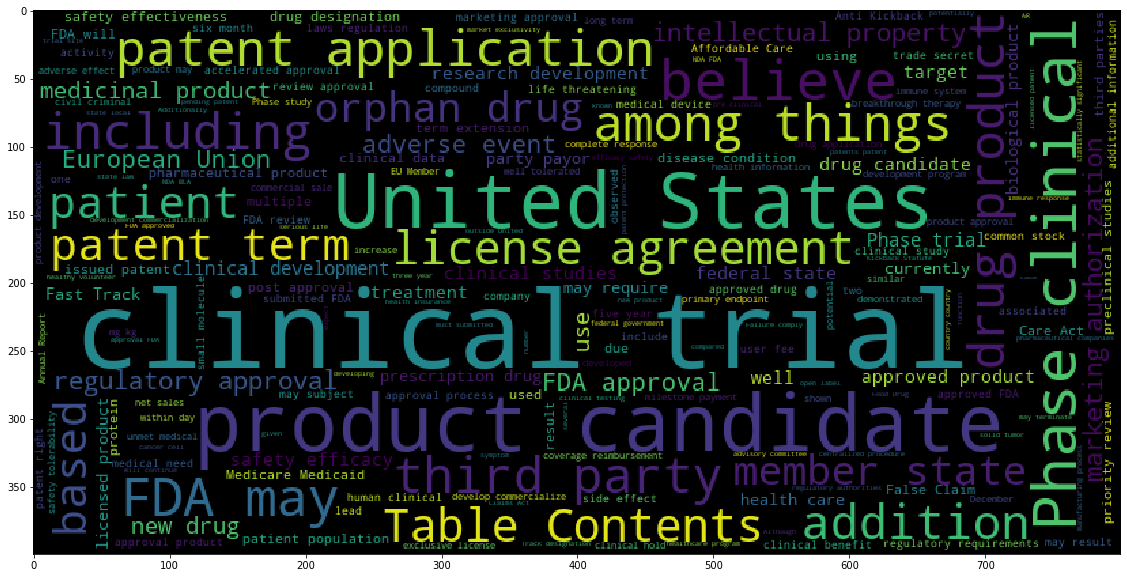

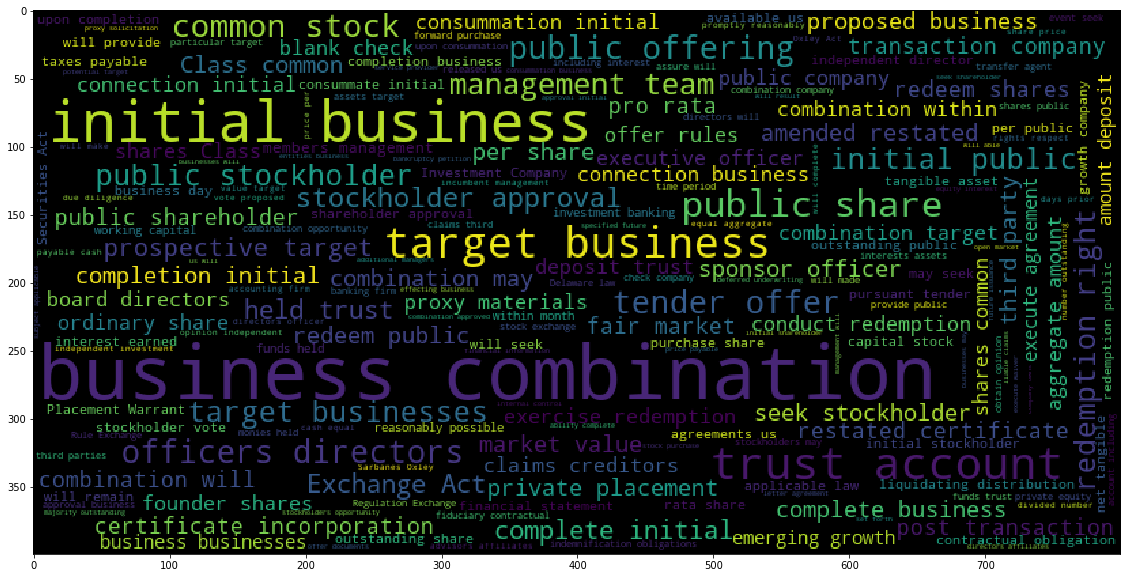

In [182]:
# 16. Make two separate word clouds for "item_1" column, 
#    one for the most common industry and another one for the second most common industry.
#    Save the 2 visualizations as "q16a.png" and "q16b.png", respectively

most_common_industries=Counter(df["industry_name"]).most_common(2)

print(most_common_industries)

text=' '.join(df.loc[(df["industry_name"]=='Pharmaceutical Preparations'),["item_1"]].iloc[:,0].tolist())

 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q16a.png') # save as PNG file
plt.show()  # show in Jupyter notebook

text=' '.join(df.loc[(df["industry_name"]=='Blank Checks'),["item_1"]].iloc[:,0].tolist())
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q16b.png') # save as PNG file
plt.show()  # show in Jupyter notebook


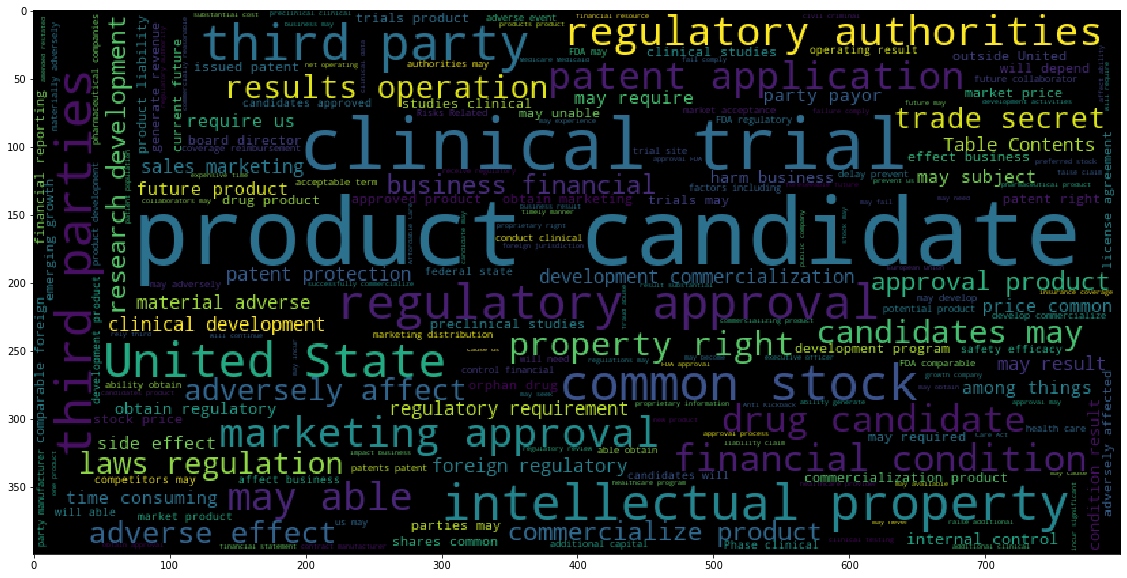

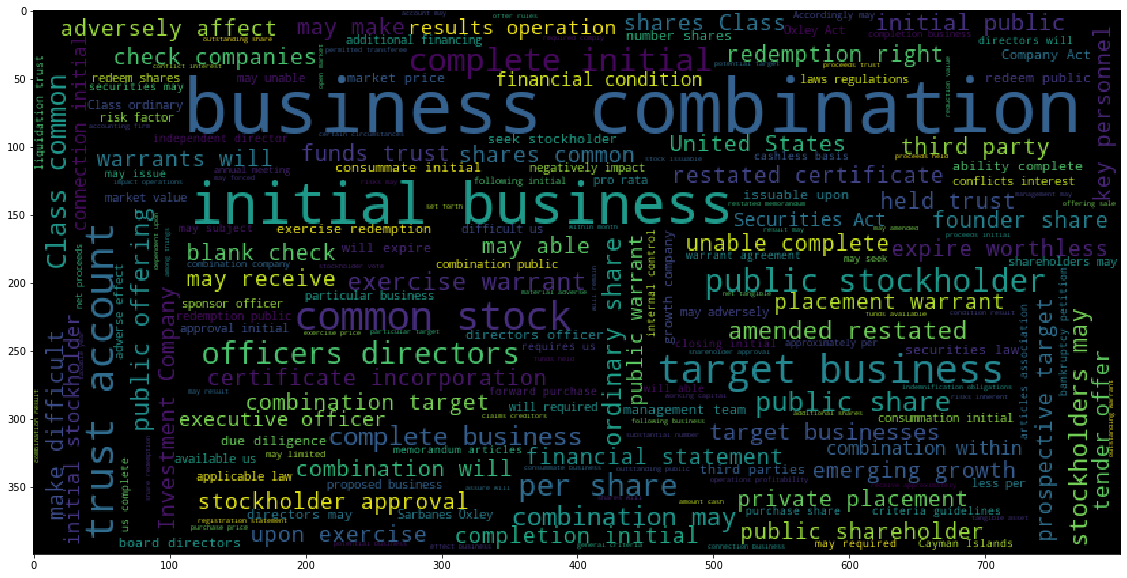

In [183]:
# 17. Make two separate clouds for "item_1a" column, 
#     one for the most common industry and another one for the second most common industry.
#     Save the 2 visualizations as "q17a.png" and "q17b.png", respectively

text=' '.join(df.loc[(df["industry_name"]=='Pharmaceutical Preparations'),["item_1a"]].iloc[:,0].tolist())
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q17a.png') # save as PNG file
plt.show()  # show in Jupyter notebook


text=' '.join(df.loc[(df["industry_name"]=='Blank Checks'),["item_1a"]].iloc[:,0].tolist())
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q17b.png') # save as PNG file
plt.show()  # show in Jupyter notebook


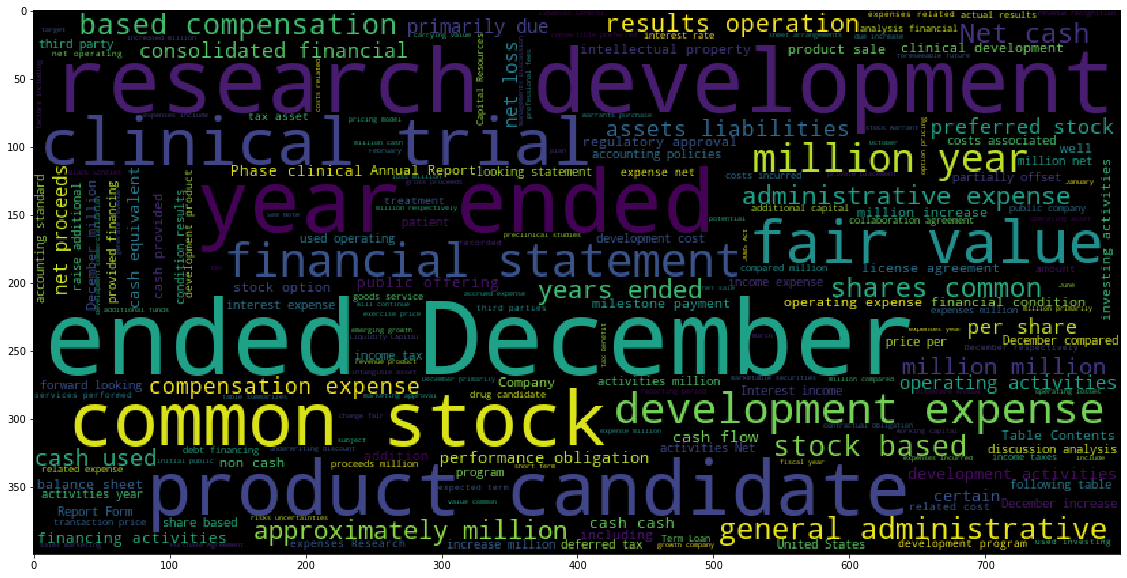

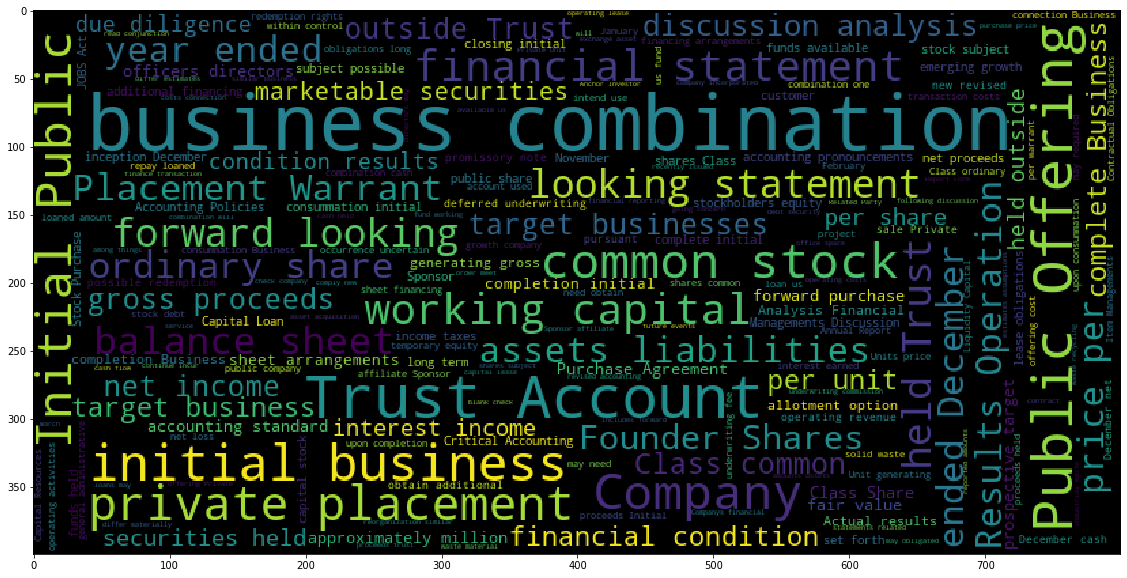

In [184]:
# 18. Make two separate clouds for "item_7" column, 
#     one for the most common industry and another one for the second most common industry.
#     Save the 2 visualizations as "q18a.png" and "q18b.png", respectively

text=' '.join(df.loc[(df["industry_name"]=='Pharmaceutical Preparations'),["item_7"]].iloc[:,0].tolist())
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q18a.png') # save as PNG file
plt.show()  # show in Jupyter notebook

text=' '.join(df.loc[(df["industry_name"]=='Blank Checks'),["item_7"]].iloc[:,0].tolist())
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("on")
plt.savefig('q18b.png') # save as PNG file
plt.show()  # show in Jupyter notebook



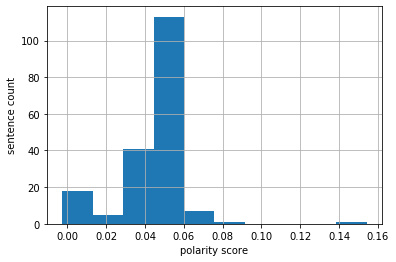

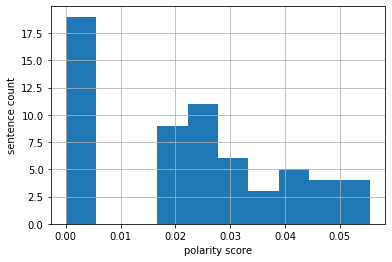

In [198]:
# 19. Make two histograms of the polarity for column "item_1a",
#     one for the most common industry and another one for the second most common industry.
#     Save the visualization as "q19a.png" and "q19b.png", respectively.

pol_list = []
for i in df.loc[(df["industry_name"]=='Pharmaceutical Preparations'),["item_1a"]].iloc[:,0]:
    tb=TextBlob(str(re.sub('\s+', ' ', i).strip()))
    pol_list.append(tb.sentiment.polarity)
    
plt.hist(pol_list, bins=10) 
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('q19a.png')
plt.show()


pol_list = []
for i in df.loc[(df["industry_name"]=='Blank Checks'),["item_1a"]].iloc[:,0]:
    tb=TextBlob(str(re.sub('\s+', ' ', i).strip()))
    pol_list.append(tb.sentiment.polarity)
    
plt.hist(pol_list, bins=10) 
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('q19b.png')
plt.show()


In [19]:
# 20. Save answers in json format. Filename: FIRSTNAME_LASTNAME_STUDENTID.json
# e.g. gene_lee_12345678.json


In [206]:
outfile = open('jatin_sharma_{}.json'.format(71151286), 'w', encoding="utf8")
outfile.write("answer1={}\n".format(ans1))
outfile.write("answer2={}\n".format(ans2))
outfile.write("answer3={}\n".format(ans3))
outfile.write("answer4={}\n".format(ans4))
outfile.write("answer5={}\n".format(ans5))
outfile.write("answer6={}\n".format(ans6))
outfile.write("answer7={}\n".format(ans7))
outfile.write("answer8={}\n".format(ans8))
outfile.write("answer9={}\n".format(ans9))
outfile.write("answer10={}\n".format(ans10))
outfile.write("answer11={}\n".format(ans11))
outfile.write("answer12={}\n".format(ans12))
outfile.write("answer13={}\n".format(ans13))
outfile.write("answer14={}\n".format(ans14))
outfile.write("answer15={}\n".format(ans15))
outfile.close()

In [20]:
# remember to convert this notebook to a .py file to submit as well